In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv("datasets/prototype_final_dataset.csv")
dataset

,Date,Time,SM_2,SM_4,SM_8,SM_20,SM_40,ST_2,ST_4,ST_8,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,01-01-2022,00:00,38.2,35.9,31.0,36.9,34.0,15.9,15.5,15.5,...,1009.4,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
1,01-01-2022,01:00,38.2,36.0,30.9,36.7,34.1,16.0,15.6,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
2,01-01-2022,02:00,38.3,36.0,31.0,36.7,33.9,16.0,15.6,15.6,...,1009.3,62.7,16.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
3,01-01-2022,03:00,38.3,35.8,30.9,36.7,33.9,16.1,15.7,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
4,01-01-2022,04:00,38.3,35.9,30.9,36.7,33.9,16.2,15.7,15.7,...,1009.6,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2022,20:00,36.7,36.2,30.5,34.7,31.8,10.2,10.0,9.9,...,1015.1,36.2,16.0,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"
8757,31-12-2022,21:00,36.5,36.1,30.3,34.9,31.8,9.9,9.9,9.8,...,1015.6,20.4,16.0,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"
8758,31-12-2022,22:00,36.5,36.1,30.3,34.8,32.0,9.7,9.7,9.8,...,1016.1,37.3,12.7,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"
8759,31-12-2022,23:00,37.2,36.0,30.3,34.8,32.0,9.4,9.6,9.7,...,1015.9,79.0,14.0,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"


In [3]:
dataset.columns

Index(['Date', 'Time', 'SM_2', 'SM_4', 'SM_8', 'SM_20', 'SM_40', 'ST_2',
       'ST_4', 'ST_8', 'ST_20', 'ST_40', 'temp', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'conditions', 'icon', 'stations'],
      dtype='object')

In [4]:
dataset.__len__()

8761

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              8760 non-null   object 
 1   Time              8760 non-null   object 
 2   SM_2              8760 non-null   float64
 3   SM_4              8760 non-null   float64
 4   SM_8              8760 non-null   float64
 5   SM_20             8760 non-null   float64
 6   SM_40             8760 non-null   float64
 7   ST_2              8760 non-null   float64
 8   ST_4              8760 non-null   float64
 9   ST_8              8760 non-null   float64
 10  ST_20             8760 non-null   float64
 11  ST_40             8760 non-null   float64
 12  temp              8760 non-null   float64
 13  feelslike         8760 non-null   float64
 14  dew               8760 non-null   float64
 15  humidity          8760 non-null   float64
 16  precip            8760 non-null   float64


In [6]:
dataset.__len__()

8761

In [7]:
dataset

,Date,Time,SM_2,SM_4,SM_8,SM_20,SM_40,ST_2,ST_4,ST_8,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,01-01-2022,00:00,38.2,35.9,31.0,36.9,34.0,15.9,15.5,15.5,...,1009.4,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
1,01-01-2022,01:00,38.2,36.0,30.9,36.7,34.1,16.0,15.6,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
2,01-01-2022,02:00,38.3,36.0,31.0,36.7,33.9,16.0,15.6,15.6,...,1009.3,62.7,16.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
3,01-01-2022,03:00,38.3,35.8,30.9,36.7,33.9,16.1,15.7,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
4,01-01-2022,04:00,38.3,35.9,30.9,36.7,33.9,16.2,15.7,15.7,...,1009.6,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,31-12-2022,20:00,36.7,36.2,30.5,34.7,31.8,10.2,10.0,9.9,...,1015.1,36.2,16.0,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"
8757,31-12-2022,21:00,36.5,36.1,30.3,34.9,31.8,9.9,9.9,9.8,...,1015.6,20.4,16.0,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"
8758,31-12-2022,22:00,36.5,36.1,30.3,34.8,32.0,9.7,9.7,9.8,...,1016.1,37.3,12.7,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"
8759,31-12-2022,23:00,37.2,36.0,30.3,34.8,32.0,9.4,9.6,9.7,...,1015.9,79.0,14.0,0.0,0.0,0.0,10.0,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ"


In [8]:
dataset.drop(
    [
        "Date",
        "SM_2",
        "SM_8",
        "SM_20",
        "SM_40",
        "ST_2",
        "ST_8",
        "ST_20",
        "ST_40",
        "solarenergy",
        "precipprob",
        "preciptype",
        "snow",
        "snowdepth",
        "windgust",
        "winddir",
        "sealevelpressure",
        "visibility",
        "solarenergy",
        "uvindex",
        "severerisk",
        "icon",
        "stations",
        "dew",
        "solarradiation",
        "Time",
        # "cloudcover",
        "feelslike",
        # "windspeed",
    ],
    inplace=True,
    axis=1,
)

In [9]:
dataset

,SM_4,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,36.0,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,36.0,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,35.8,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,35.9,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...
8756,36.2,10.0,12.5,90.76,0.0,4.0,36.2,Partially cloudy
8757,36.1,9.9,11.4,93.88,0.0,5.6,20.4,Partially cloudy
8758,36.1,9.7,10.7,96.47,0.0,0.0,37.3,Partially cloudy
8759,36.0,9.6,10.1,99.41,0.0,7.0,79.0,Partially cloudy


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SM_4        8760 non-null   float64
 1   ST_4        8760 non-null   float64
 2   temp        8760 non-null   float64
 3   humidity    8760 non-null   float64
 4   precip      8760 non-null   float64
 5   windspeed   8760 non-null   float64
 6   cloudcover  8760 non-null   float64
 7   conditions  8760 non-null   object 
dtypes: float64(7), object(1)
memory usage: 547.7+ KB


In [11]:
dataset = dataset.dropna()

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8759 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SM_4        8759 non-null   float64
 1   ST_4        8759 non-null   float64
 2   temp        8759 non-null   float64
 3   humidity    8759 non-null   float64
 4   precip      8759 non-null   float64
 5   windspeed   8759 non-null   float64
 6   cloudcover  8759 non-null   float64
 7   conditions  8759 non-null   object 
dtypes: float64(7), object(1)
memory usage: 615.9+ KB


In [13]:
dataset.columns

Index(['SM_4', 'ST_4', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'conditions'],
      dtype='object')

In [14]:
Categorical_unique_conditions = dataset.conditions.unique()
print(Categorical_unique_conditions)
print(len(Categorical_unique_conditions))

['Overcast' 'Partially cloudy' 'Rain, Partially cloudy' 'Rain, Overcast'
 'Snow, Rain, Overcast' 'Snow, Rain, Partially cloudy' 'Clear'
 'Snow, Overcast' 'Rain']
9


In [15]:
dataset

,SM_4,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,35.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,36.0,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,36.0,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,35.8,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,35.9,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...
8755,36.5,10.1,14.7,77.19,0.0,0.0,37.3,Partially cloudy
8756,36.2,10.0,12.5,90.76,0.0,4.0,36.2,Partially cloudy
8757,36.1,9.9,11.4,93.88,0.0,5.6,20.4,Partially cloudy
8758,36.1,9.7,10.7,96.47,0.0,0.0,37.3,Partially cloudy


In [16]:
X = dataset.iloc[:, 1:].values
X

array([[15.5, 21.6, 84.5, ..., 22.3, 100.0, 'Overcast'],
       [15.6, 21.6, 84.97, ..., 27.7, 91.7, 'Overcast'],
       [15.6, 21.2, 86.87, ..., 22.8, 62.7, 'Partially cloudy'],
       ...,
       [9.9, 11.4, 93.88, ..., 5.6, 20.4, 'Partially cloudy'],
       [9.7, 10.7, 96.47, ..., 0.0, 37.3, 'Partially cloudy'],
       [9.6, 10.1, 99.41, ..., 7.0, 79.0, 'Partially cloudy']],
      dtype=object)

In [17]:
y = dataset.iloc[:, 0].values
y

array([35.9, 36. , 36. , ..., 36.1, 36.1, 36. ])

In [18]:
""" taking care of categorical data in conditions column """
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [-1])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 0.0, ..., 0.0, 22.3, 100.0],
       [0.0, 1.0, 0.0, ..., 0.0, 27.7, 91.7],
       [0.0, 0.0, 1.0, ..., 0.0, 22.8, 62.7],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 5.6, 20.4],
       [0.0, 0.0, 1.0, ..., 0.0, 0.0, 37.3],
       [0.0, 0.0, 1.0, ..., 0.0, 7.0, 79.0]], dtype=object)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=0
)

In [20]:
print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)

X_train shape =  (7445, 15)
y_train shape =  (7445,)


In [21]:
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_test shape =  (1314, 15)
y_test shape =  (1314,)


In [22]:
X_train[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.5, 33.8, 57.1, 0.0,
       8.3, 85.2], dtype=object)

In [23]:
y_train[0]

20.9

In [24]:
""" Scaling data """
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train[:, 9:] = sc.fit_transform(X_train[:, 9:])
X_test[:, 9:] = sc.transform(X_test[:, 9:])
X_train[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9045936395759717,
       0.9559386973180075, 0.4968922246980181, 0.0, 0.1930232558139535,
       0.8520000000000001], dtype=object)

In [25]:
X_train[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9045936395759717,
       0.9559386973180075, 0.4968922246980181, 0.0, 0.1930232558139535,
       0.8520000000000001], dtype=object)

In [26]:
X_train[0].shape

(15,)

In [27]:
X_train = np.asarray(X_train).astype("float32")
y_train = np.asarray(y_train).astype("float32")

<h1>ANN model </h1>


In [28]:
X_test = np.asarray(X_test).astype("float32")
y_test = np.asarray(y_test).astype("float32")


Epoch 1/100


233/233 [==============================] - 1s 2ms/step - loss: 537.7573 - mean_absolute_error: 19.8531 - val_loss: 43.0716 - val_mean_absolute_error: 5.6945
Epoch 2/100
233/233 [==============================] - 0s 1ms/step - loss: 30.9164 - mean_absolute_error: 4.7350 - val_loss: 21.6134 - val_mean_absolute_error: 3.8885
Epoch 3/100
233/233 [==============================] - 0s 1ms/step - loss: 17.5426 - mean_absolute_error: 3.4455 - val_loss: 16.1458 - val_mean_absolute_error: 3.2340
Epoch 4/100
233/233 [==============================] - 0s 1ms/step - loss: 14.9497 - mean_absolute_error: 3.1420 - val_loss: 14.9033 - val_mean_absolute_error: 3.1075
Epoch 5/100
233/233 [==============================] - 0s 1ms/step - loss: 14.0362 - mean_absolute_error: 3.0417 - val_loss: 14.2892 - val_mean_absolute_error: 3.0302
Epoch 6/100
233/233 [==============================] - 0s 996us/step - loss: 13.6766 - mean_absolute_error: 3.0015 - val_loss: 13.9490 - val_mean_absolute_error

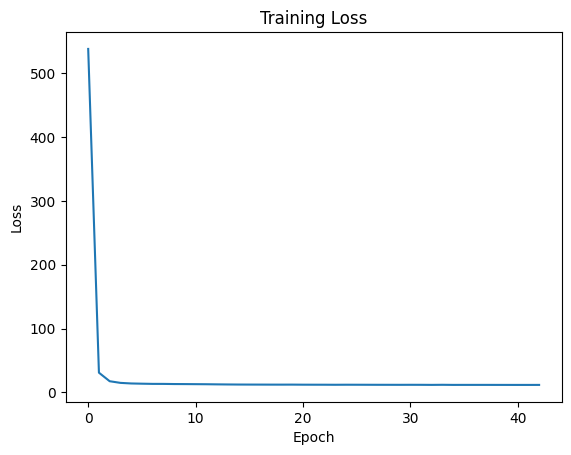

In [29]:
""" Model """
ANN_model = keras.Sequential(
    [
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(4, activation="relu"),
        keras.layers.Dense(2, activation="relu"),
        keras.layers.Dense(1),
    ]
)

ANN_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.mean_squared_error,
    metrics=keras.metrics.mean_absolute_error,
)
early_stopping = EarlyStopping(patience=5)
history = ANN_model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)

ANN_model.summary()

plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [30]:
ann_ypred = ANN_model.predict(X_test)


annMAE = mean_absolute_error(y_test, ann_ypred)


annMSE = mean_squared_error(y_test, ann_ypred)

ann_r2 = r2_score(y_test, ann_ypred)


print("mean absolute error = ", annMAE)
print("mean Squared error = ", annMSE)
print("r2 score = ", ann_r2)

42/42 [==============================] - 0s 732us/step
mean absolute error =  2.6989665
mean Squared error =  12.107091
r2 score =  0.5684775316809096


Text(0.5, 1.0, 'ANN_model')

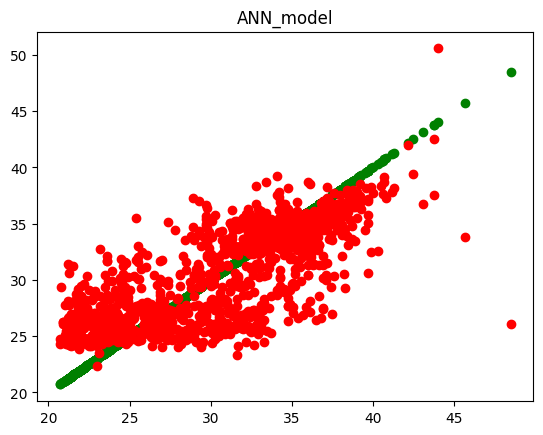

In [31]:
plt.scatter(y_test, y_test, color="green")
plt.scatter(y_test, ann_ypred, color="red")
plt.title("ANN_model")

<H1>MULTIPLE LINEAR REGRESSION </H1>


In [32]:
from sklearn.linear_model import LinearRegression

MLR_model = LinearRegression()
MLR_model.fit(X_train, y_train)

LinearRegression()

In [33]:
mlr_ypred = MLR_model.predict(X_test)

In [34]:
mlr_MAE = mean_absolute_error(y_test, mlr_ypred)
mlr_MSE = mean_squared_error(y_test, mlr_ypred)
mlr_r2 = r2_score(y_test, mlr_ypred)
print("mean absolute error = ", mlr_MAE)
print("mean Squared error = ", mlr_MSE)
print("r2 score = ", mlr_r2)

mean absolute error =  3.0007312
mean Squared error =  13.922258
r2 score =  0.5037810939457144


Text(0.5, 1.0, 'MLR_model')

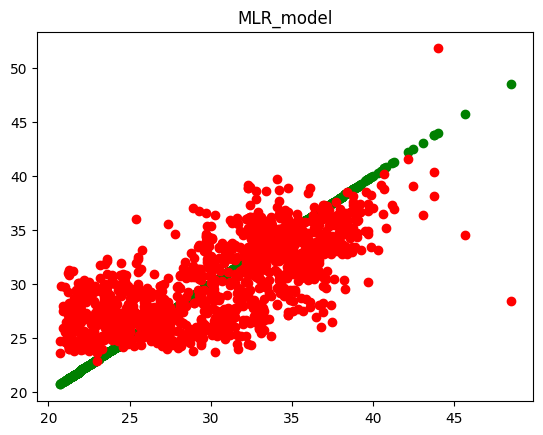

In [35]:
plt.scatter(y_test, y_test, color="green")
plt.scatter(y_test, mlr_ypred, color="red")
plt.title("MLR_model")

<h1>DECISION TREE REGRESSION </H1>


In [36]:
from sklearn.tree import DecisionTreeRegressor

# Increase maximum depth
DTR_model = DecisionTreeRegressor(
    max_depth=13, random_state=0, min_samples_split=20)

# Fine-tune hyperparameters
DTR_model.fit(X_train, y_train)

dtr_ypred = DTR_model.predict(X_test).reshape(-1, 1)

dtr_mae = mean_absolute_error(y_test, dtr_ypred)
dtr_mse = mean_squared_error(y_test, dtr_ypred)
dtr_r2 = r2_score(y_test, dtr_ypred)
print("mean absolute error = ", dtr_mae)
print("mean Squared error = ", dtr_mse)
print("r2 score = ", dtr_r2)

mean absolute error =  2.331529393480891
mean Squared error =  11.3697717310569
r2 score =  0.5947571586724782


Text(0.5, 1.0, 'DecisionTreeRegressor(max_depth=13, min_samples_split=20, random_state=0)')

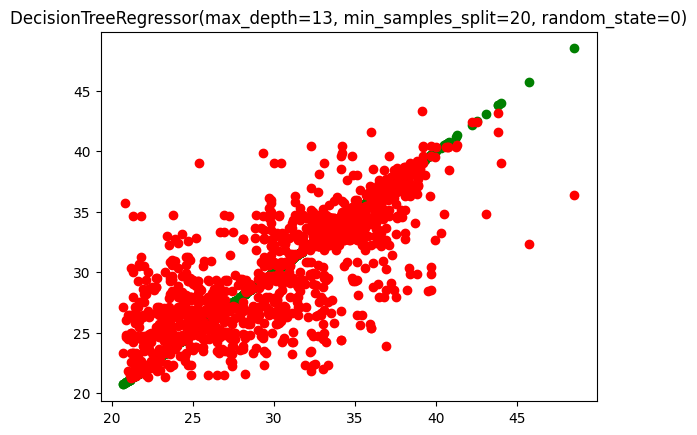

In [37]:
plt.scatter(y_test, y_test, color="green")
plt.scatter(y_test, dtr_ypred, color="red")
plt.title(DTR_model)

<h1>GRADIENT BOOSTING REGRESSOR </h1>

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(
    learning_rate=0.2,
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=4,
                          min_samples_split=10, n_estimators=200)

In [39]:
gbr_ypred = GBR.predict(X_test)

In [40]:
print("mean_absolute_error = ", mean_absolute_error(y_test, gbr_ypred))
print("mean_squared_error = ", mean_squared_error(y_test, gbr_ypred))
print("r2 score = ", r2_score(y_test, gbr_ypred))

mean_absolute_error =  2.3639974436172446
mean_squared_error =  9.59216029366733
r2 score =  0.6581150102374618


Text(0.5, 1.0, 'GBR')

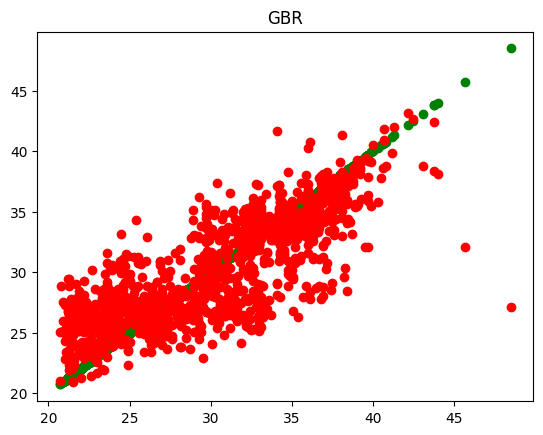

In [41]:
plt.scatter(y_test, y_test, color="green")
plt.scatter(y_test, gbr_ypred, color="red")
plt.title("GBR")

<h1>MODEL COMPARISON </H1>

In [42]:
def least_error(row):
    y_true = row[0]
    cols = ["ytest", "DTR", "MLR", "ANN", "GBR"]
    lowest = 1000
    least_err = "DTR"
    for i in range(1, len(cols)):
        diff = abs(y_true - row[i])
        if diff < lowest:
            lowest, least_err = diff, cols[i]
    return least_err

In [43]:
reshape = (-1, 1)
comp = np.concatenate(
    (
        y_test.reshape(reshape),
        dtr_ypred.reshape(reshape),
        mlr_ypred.reshape(reshape),
        ann_ypred.reshape(reshape),
        gbr_ypred.reshape(reshape),
    ),
    1,
)


comparison = pd.DataFrame(
    comp, columns=["ytest", "DTR", "MLR", "ANN",  "GBR"])
comparison["winner"] = comparison.apply(
    least_error, axis=1, result_type="expand", raw=True
)
comparison.to_csv("testing and results/model test comparison.csv")

In [44]:
reshape = (-1, 1)
comp = np.concatenate(
    (
        y_train.reshape(reshape),
        DTR_model.predict(X_train).reshape(reshape),
        MLR_model.predict(X_train).reshape(reshape),
        ANN_model.predict(X_train).reshape(reshape),
        GBR.predict(X_train).reshape(reshape),
    ),
    1,
)


comparison_train = pd.DataFrame(
    comp, columns=["ytest", "DTR", "MLR", "ANN", "GBR"]
)
comparison_train["winner"] = comparison_train.apply(
    least_error, axis=1, result_type="expand", raw=True
)
comparison_train.to_csv("testing and results/model train comparison.csv")

233/233 [==============================] - 0s 681us/step


In [45]:
comparison_train.winner.describe()

count     7445
unique       4
top        DTR
freq      3658
Name: winner, dtype: object

In [46]:
comparison.winner.describe()

count     1314
unique       4
top        DTR
freq       534
Name: winner, dtype: object

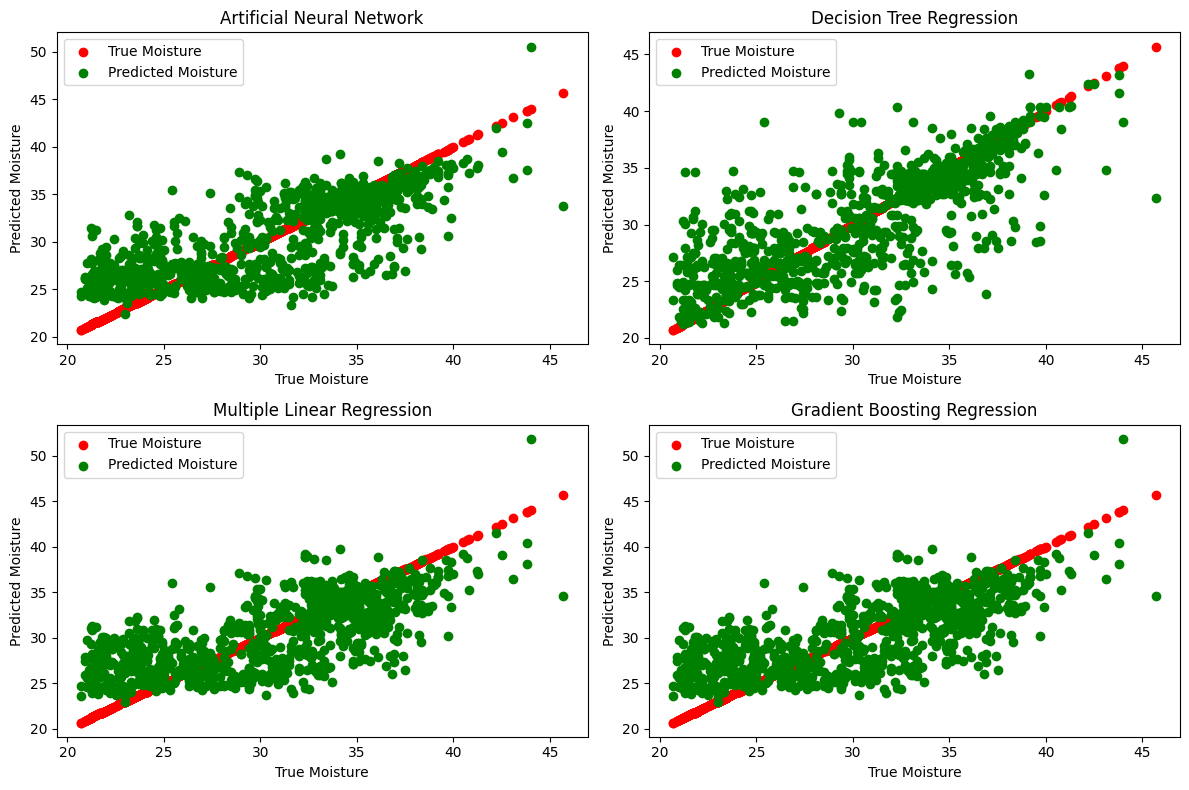

In [51]:
import matplotlib.pyplot as plt

# Assuming you have already defined y_test, ann_ypred, dtr_ypred, svr_ypred, and mlr_ypred

# Create a figure with a specific size
plt.figure(figsize=(12, 8))

# Subplot 1
plt.subplot(221)
plt.scatter(y_test[:1000], y_test[:1000], color="red", label="True Moisture")
plt.scatter(y_test[:1000], ann_ypred[:1000],
            color="green", label="Predicted Moisture")
plt.title("Artificial Neural Network")
plt.xlabel("True Moisture")
plt.ylabel("Predicted Moisture")
plt.legend()

# Subplot 2
plt.subplot(222)
plt.scatter(y_test[:1000], y_test[:1000], color="red", label="True Moisture")
plt.scatter(y_test[:1000], dtr_ypred[:1000],
            color="green", label="Predicted Moisture")
plt.title("Decision Tree Regression")
plt.xlabel("True Moisture")
plt.ylabel("Predicted Moisture")
plt.legend()

# Subplot 3
plt.subplot(223)
plt.scatter(y_test[:1000], y_test[:1000], color="red", label="True Moisture")
plt.scatter(y_test[:1000], mlr_ypred[:1000],
            color="green", label="Predicted Moisture")
plt.title("Multiple Linear Regression")
plt.xlabel("True Moisture")
plt.ylabel("Predicted Moisture")
plt.legend()

# subplot4
plt.subplot(224)
plt.scatter(y_test[:1000], y_test[:1000], color="red", label="True Moisture")
plt.scatter(y_test[:1000], mlr_ypred[:1000],
            color="green", label="Predicted Moisture")
plt.title("Gradient Boosting Regression")
plt.xlabel("True Moisture")
plt.ylabel("Predicted Moisture")
plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

<h1>SAVING MODELS</h1>

In [49]:
import joblib


joblib.dump(ct, "final_model/moisture_pred_columntranformer.joblib")
joblib.dump(sc, "final_model/moisture_pred_minmaxscalar.joblib")


ANN_model.save(filepath="final_model/zeus.keras")  # Neural Network model


joblib.dump(DTR_model, filename="final_model/dtr.bin")  # Decision tree model


# Multiple linear regression model


joblib.dump(MLR_model, filename="final_model/mlrmodel.bin")


# Gradient boosting regressor

joblib.dump(GBR, filename="final_model/GBR.bin")

['final_model/GBR.bin']